In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Delotte Review.csv')

In [3]:
df.head()

,Review
0,Amazing growth opportunity Minimal work politi...
1,Work life balance could be difficult during bu...
2,"The ""everything's about your network"" culture ..."
3,"Lot of burocracy, not embedded projects anymore"
4,"you can learn a lot, earnings are not so bad b..."


In [10]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load the pre-trained model and tokenizer directly suited for sentiment classification
model_name = "finiteautomata/bertweet-base-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a pipeline for sentiment analysis
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Example texts
texts = df['Review'].tolist()

# Perform sentiment analysis
results = sentiment_analysis(texts)



emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [12]:

data = {
    "Text": texts,
    "Sentiment": [result['label'] for result in results],
    "Confidence": [result['score'] for result in results]
}

# Create the DataFrame
data = pd.DataFrame(data)

# Display the DataFrame
data

,Text,Sentiment,Confidence
0,Amazing growth opportunity Minimal work politi...,POS,0.987655
1,Work life balance could be difficult during bu...,NEG,0.669368
2,"The ""everything's about your network"" culture ...",NEG,0.658737
3,"Lot of burocracy, not embedded projects anymore",NEG,0.919892
4,"you can learn a lot, earnings are not so bad b...",NEU,0.674880
5,Atmosphere might be a bit toxic because of a l...,NEG,0.921963
6,Compensation on the low side Small salary rais...,NEU,0.658668
7,"The work environment is truly unique, with a f...",POS,0.992105
8,"None, I would highly recommend this company to...",POS,0.989645
9,"Organized, Work-life balance, culture, no reta...",POS,0.903878


In [17]:
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
POS    19
NEU    14
NEG    13
Name: count, dtype: int64


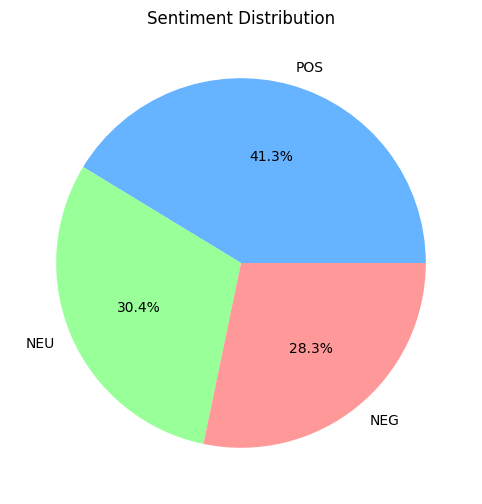

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Sentiment Distribution')
plt.show()
#